--- 
### **1. 공간 데이터 기본 타입**

In [ ]:
### install
!pip install matplotlib

In [2]:
### Library
from shapely.geometry import Point, LineString, Polygon
import shapely.plotting as plotting
import matplotlib.pyplot as plt

---
#### **1-1. Point, LineString, Polygon**
- `point` : 점
- `LineString` : 선
- `Polygon` : 면
<br></br>

- **Point**

In [2]:
# Point 생성
point_1, point_2, point_3, point_4 = map(Point, [[2,5], [4,7], [9,3], [8,8]])

''' 위 코드와 동일 결과
point_1 = Point([2,5])
point_2 = Point([4,7])
point_3 = Point([9,3])
point_4 = Point([8,8])
'''

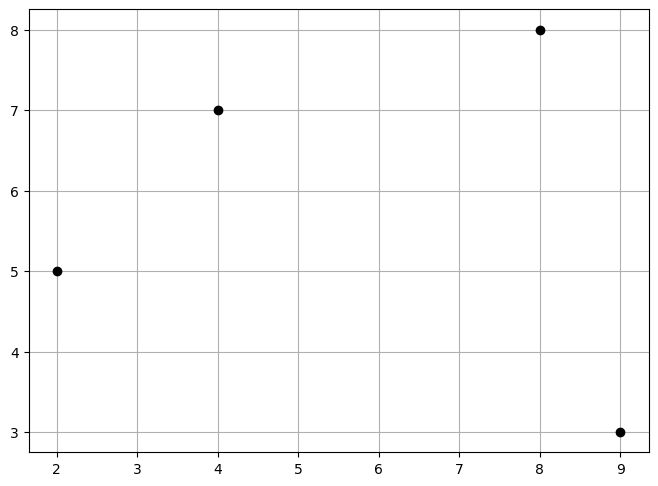

In [4]:
### Point plot
plt.figure(figsize=(8,6))
plotting.plot_points([point_1, point_2, point_3, point_4], color='black')
plt.show()

In [5]:
### Point의 x,y 좌표 확인
point_1.x, point_1.y

(2.0, 5.0)

- **Linestring**

In [6]:
### Linestring 생성
linestring_1 = LineString([[1,1], [2,4], [8,9], [4,1]])

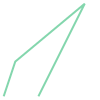

In [7]:
linestring_1

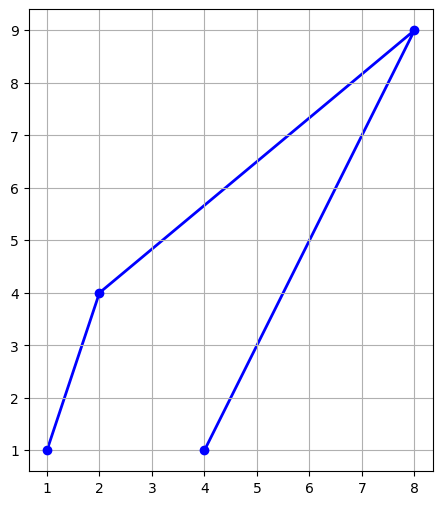

In [8]:
### Linestring plot
plt.figure(figsize=(8,6))
plotting.plot_line(linestring_1, color='blue')
plt.show()

In [9]:
### Linestring의 x,y 좌표 확인
linestring_1.xy # = linestring_1.coords.xy

(array('d', [1.0, 2.0, 8.0, 4.0]), array('d', [1.0, 4.0, 9.0, 1.0]))

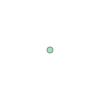

In [10]:
### Linestring의 중심 좌표
linestring_1.centroid

In [11]:
### Linestring의 길이
linestring_1.length

19.91679924607419

- **Polygon** 

In [12]:
### Polygon 생성
polygon_1 = Polygon([[1,1], [2,8], [8,9], [9,2], [1,1]])

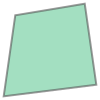

In [13]:
polygon_1

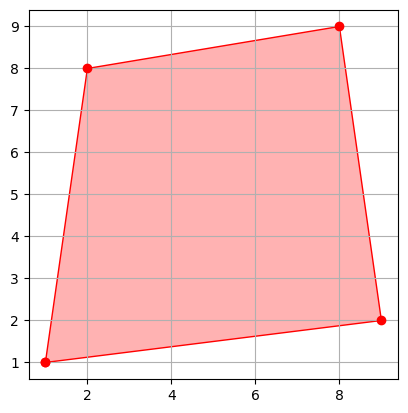

In [14]:
### Polygon plot
plotting.plot_polygon(polygon_1, color='red')
plt.show()

In [15]:
### Polygon의 넓이
polygon_1.area

49.0

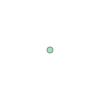

In [16]:
### Polygon의 중심 좌표
polygon_1.centroid

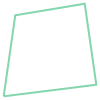

In [17]:
### Polygon 외곽선
polygon_1.exterior

In [18]:
### Polygon 외곽선 좌표
polygon_1.exterior.xy

(array('d', [1.0, 2.0, 8.0, 9.0, 1.0]), array('d', [1.0, 8.0, 9.0, 2.0, 1.0]))

In [19]:
### Polygon 외곽선 길이
polygon_1.exterior.length #= polygon_1.length

28.28715590232772

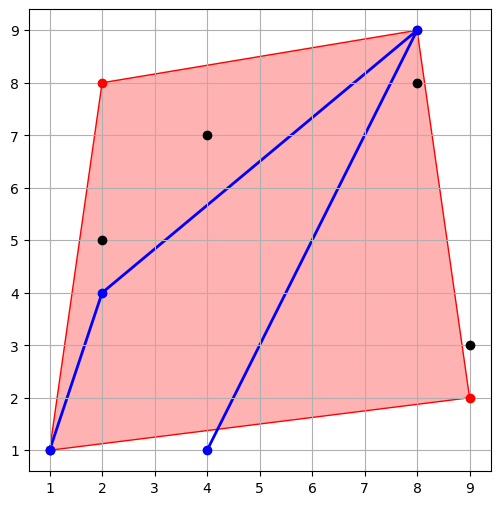

In [20]:
### point, linestring, polygon 전체 시각화
plt.figure(figsize=(8,6))
plotting.plot_polygon(polygon_1, color='red')
plotting.plot_line(linestring_1, color='blue')
plotting.plot_points([point_1, point_2, point_3, point_4], color='black')
plt.show()

---
#### **1-2. within, contains, intersects, crosses**
- `within` : 지리적으로 포함되는지 여부
    - `point.within(polygon)`
- `contains` : 지리적으로 포함되는지 여부
    - `polygon.contains(point)`
- `intersects` : 지리적으로 교차하는지 여부, 두 지리가 경계선만 닿아있어도, True 반환
- `crosses` : 지리적으로 교차하는지 여부, intersects와 차이점은 crosses는 내부를 지나가야만 True를 반환 (지리 데이터의 boundary가 있는 데이터 끼리만 사용, 다른 말로 Point가 아닌 지리 정보 데이터 끼리 사용)
<br></br>
- *위의 함수는 추후에 나오는 geopandas의 sjoin로 대체 가능*
<br></br>

- **within**

In [11]:
'''within (Point-Polygon)'''

# Create a point and a polygon
point = Point(1, 1)
polygon = Polygon([(0, 0), (0, 2), (2, 2), (2, 0)])

# Check if the point is within the polygon
result = point.within(polygon)
print(result)  # True

True


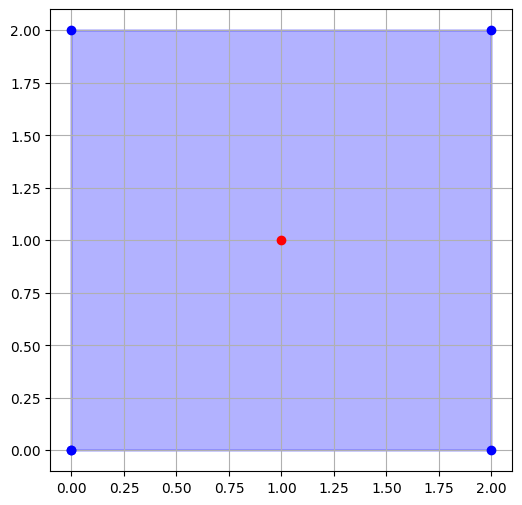

In [12]:
plt.figure(figsize=(8,6))
plotting.plot_points(point, color='red')
plotting.plot_polygon(polygon, color='blue')
plt.show()

- **contains**

In [14]:
'''contains (Point-Polygon)'''

# Create a point and a polygon
point = Point(1, 1)
polygon = Polygon([(0, 0), (0, 2), (2, 2), (2, 0)])

# Check if the polygon contains the point
result = polygon.contains(point)
print(result)  # True

True


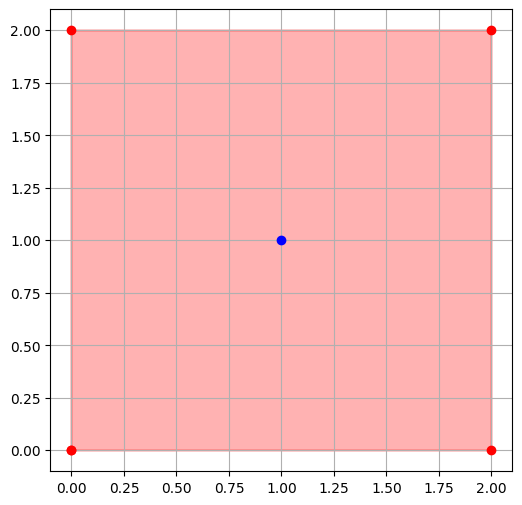

In [15]:
plt.figure(figsize=(8,6))
plotting.plot_points(point, color='blue')
plotting.plot_polygon(polygon, color='red')
plt.show()

- **intersects**

In [16]:
'''intersects (Point-Polygon)'''

# Create a point and a polygon
point = Point(1, 1)
polygon = Polygon([(0, 0), (0, 2), (2, 2), (2, 0)])

# Check if the point intersects with the polygon
result = point.intersects(polygon)
print(result)  # True

True


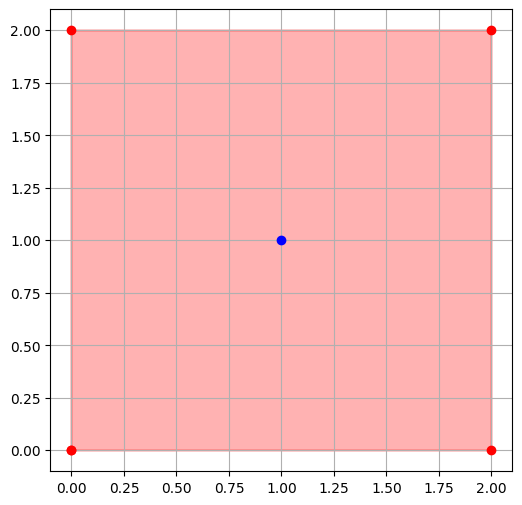

In [17]:
plt.figure(figsize=(8,6))
plotting.plot_points(point, color='blue')
plotting.plot_polygon(polygon, color='red')
plt.show()

- **crosses**

In [23]:
'''crosses (LineString-LineString)'''

# Create two lines
line1 = LineString([(0, 0), (2, 2)])
line2 = LineString([(0, 2), (2, 0)])

# Check if the lines cross each other
result = line1.crosses(line2)
print(result)  # True

True


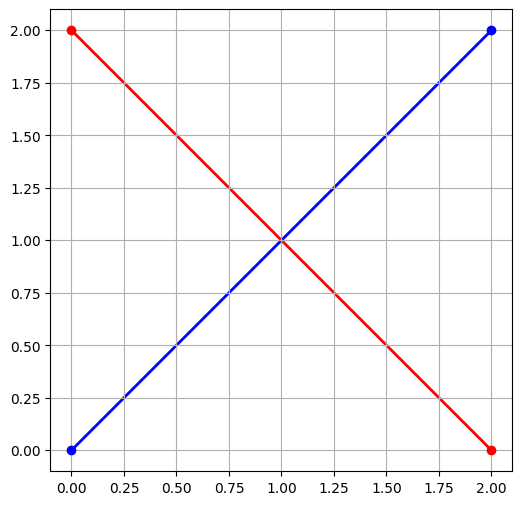

In [22]:
plt.figure(figsize=(8,6))
plotting.plot_line(line1, color='blue')
plotting.plot_line(line2, color='red')
plt.show()

---